# Setting up the Hamiltonian



Take the effective Hamiltonian from the Kitaev Honeycomb model:

$\begin{align}
\mathcal{H}_\text{eff} = \frac{\text{i}}{4} \sum_{j,k} A_{jk} c_jc_k
\end{align}$

with $A_{jk} = 2J (\longleftarrow)_{jk} + 2K (\Longleftarrow)_{jk}$ and $K \simeq \frac{h_x h_y h_z}{J^2}$. Here $(\longleftarrow)_{jk}$ bind nearest neighbors with $+1$ if there is a solid arrow from $k$ to $j$, and $-1$ if an arrow goes from $j$ to $k$, $0$ otherwise. $(\Longleftarrow)_{jk}$ is defined similarly except that it combines next nearest neighbors.

We now introduce double indices $j\to(\lambda,s)$ where $s$ goes over all unit cell and $\lambda = 1,2$ marks the spin within one unit cell.

$\begin{align}
\mathcal{H}_\text{eff} = \frac{\text{i}}{4} \sum_{\lambda,\mu = 1,2} \sum_{s,t} A_{\lambda s, \mu t} c_{\lambda s} c_{\mu t}
\end{align}$

With the definition of $A$ we can sum over all bonds going from a unit cell at $\textbf{r}$. There is an additional factor of $2$ to prevent undercounting. Notice that we use the honeycomb lattice vectors $\textbf{n}_1 = \left(-\frac{1}{2},\frac{\sqrt{3}}{2}\right)$ and $\textbf{n}_2 = \left(\frac{1}{2},\frac{\sqrt{3}}{2}\right)$.

$\begin{align}
\mathcal{H}_\text{eff} = \text{i} \sum_{\textbf{r}} \left[ J_x c_{1,\textbf{r}} c_{2,\textbf{r}-\textbf{n}_1} + J_y c_{1,\textbf{r}} c_{2,\textbf{r}-\textbf{n}_2} + J_z c_{1,\textbf{r}} c_{2,\textbf{r}} + K \left( c_{1,\textbf{r}} c_{1,\textbf{r}-\textbf{n}_1} - c_{1,\textbf{r}} c_{1,\textbf{r}-\textbf{n}_2} + c_{1,\textbf{r}} c_{1,\textbf{r}+\textbf{n}_1-\textbf{n}_2} - c_{2,\textbf{r}} c_{2,\textbf{r}-\textbf{n}_1} + c_{2,\textbf{r}} c_{2,\textbf{r}-\textbf{n}_2} - c_{2,\textbf{r}} c_{2,\textbf{r}+\textbf{n}_1-\textbf{n}_2}\right)\right]
\end{align}$


With the properties of Majorana operators $c_j = c^\dagger_j$ and $\left\{ c_j, c_k \right\} = 2\delta_{jk}$ one can indicate that $\mathcal{H}_\text{eff}$ is Hermitian by rewriting $\text{i} c_j c_k = \text{i} \left( c_j^\dagger c_k - c_k^\dagger c_j\right)$.

Now write $\textbf{r} = r_1 \textbf{n}_1 + r_2 \textbf{n}_2$ and $\textbf{k} = k_1 \textbf{n}_1 + k_2 \textbf{n}_2$ to perform a Fourier transform along $\textbf{n}_2$.

$\begin{align}
c_{\lambda,\textbf{r}} = \frac{1}{\sqrt{N}} \sum_{k_2\in \text{1.BZ}} c_{\lambda,r_1}(k_2)e^{\mathrm{i}k_2r_2}
\end{align}$

Here $N$ is the number of unit cells. Using this Fourier transform, one finds the following matrix representation for the Hamiltonian:

$\begin{align}
\mathcal{H}_\text{eff} =  \sum_{r_1} \sum_{k_2\in\text{1.BZ}}\left( c_{1,1}^\dagger(k_2), c_{2,1}^\dagger(k_2), \cdots, c_{1,N}^\dagger(k_2), c_{2,N}^\dagger(k_2) \right)
\left(\begin{matrix}
M & L & 0 & 0 & \cdots & 0 \\
L^\dagger & M & L & & & \vdots\\
0 & L^\dagger & M & \ddots & & \vdots\\
\vdots & & \ddots& \ddots & \ddots& 0 \\
\vdots & & &\ddots & M & L \\
0 & \cdots & \cdots & & L^\dagger & M
\end{matrix}\right)
\left(\begin{matrix} c_{1,1}(k_2)\\ c_{2,1}(k_2)\\ \vdots\\ \vdots\\ c_{1,N}(k_2) \\ c_{2,N}(k_2) \end{matrix}\right)
\end{align}$

with $M = \left( \begin{matrix} -K \sin k_2 & \frac{\text{i}}{2}\left(J_ye^{-\text{i}k_2}+J_z\right) \\
-\frac{\text{i}}{2}\left(J_ye^{\text{i}k_2}+J_z\right) & K \sin k_2 \end{matrix}\right)$ and $L =  \left(\begin{matrix}  \frac{\text{i}}{2}K \left(e^{-\mathrm{i}k_2}-1\right) & 0 \\ - \frac{\text{i}}{2} J_x &    -\frac{\text{i}}{2}K \left(e^{-\mathrm{i}k_2}-1\right) \end{matrix}\right)$

In order to find the energy spectrum of the system and investigate how it changes by applying some finite magnetic field, we have to diagonalize the $2N\times 2N$-matrix from above.

In [1]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim

In [2]:
function Hamiltonian(N,Jx,Jy,Jz,hx,hy,hz,k)
    
    H = zeros(2*N,2*N)
    H = complex(H)
    
    K = hx*hy*hz/(Jx*Jy*Jz)
    
    M = zeros(2,2)
    M = complex(M)
    
    M[1,1] = -K*sin(k)
    M[2,2] = K*sin(k)
    M[1,2] = im/2*(Jy*exp(-im*k)+Jz)
    M[2,1] = -im/2*(Jy*exp(im*k)+Jz)
    
     
    L = zeros(2,2)
    L = complex(L)
    
    L[1,1] = im*K/2*(exp(-im*k)-1)
    L[2,2] = -im*K/2*(exp(-im*k)-1)
    L[1,2] = 0
    L[2,1] = -im/2*Jx
    
    Lt = transpose(conj(L))
    
    for j in 1:N
        
        H[2*j-1,2*j-1] = M[1,1]
        H[2*j,2*j] = M[2,2]
        H[2*j-1,2*j] = M[1,2]
        H[2*j,2*j-1] = M[2,1]
        
    end
    
    for j in 1:N-1
        
        H[2*j-1,2*j+1] = L[1,1]
        H[2*j-1,2*j+2] = L[1,2]
        H[2*j,2*j+1] = L[2,1]
        H[2*j,2*j+2] = L[2,2]
        
        H[2*j+1,2*j-1] = Lt[1,1]
        H[2*j+1,2*j] = Lt[1,2]
        H[2*j+2,2*j-1] = Lt[2,1]
        H[2*j+2,2*j] = Lt[2,2]
        
    end
    
    return H
end

Hamiltonian (generic function with 1 method)

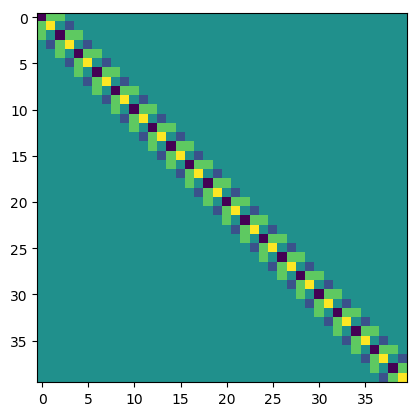

PyObject <matplotlib.image.AxesImage object at 0x00000000245C2470>

In [3]:
H = Hamiltonian(20,1.0,1.0,1.0,1.0,1.0,1.0,2.0)

imshow(real(H))

In [4]:
eigvals(H)

40-element Array{Float64,1}:
 -2.57488
 -2.52234
 -2.43644
 -2.31964
 -2.17546
 -2.00847
 -1.82443
 -1.63057
 -1.43614
 -1.28292
 -1.25795
 -1.23844
 -1.18331
  ⋮      
  1.23844
  1.25795
  1.28292
  1.43614
  1.63057
  1.82443
  2.00847
  2.17546
  2.31964
  2.43644
  2.52234
  2.57488

# Energy Spectrum for $k \in [0,2\pi]$ and some $h \in [0,1]$

In [7]:
function plot_h(h)
    clf()

    N = 50
    
    k_vals = collect(0:0.01:2*Float64(pi))
    spectra = zeros(2N, length(k_vals))
    
    Jx = 1.0
    Jy = 1.0
    Jz = 1.0
    
    hx = h
    hy = h
    hz = h

    for (j,k) in enumerate(k_vals)
        H = Hamiltonian(N,Jx,Jy,Jz,hx,hy,hz,k)
        spectra[:,j] = eigvals(H)
    end
    for i in 1:2N
        plot(k_vals,spectra[i,:],color="grey")
    end
    xlabel(L"k")
    ylabel(L"ϵ(k)")
    xlim(0,2*pi)
    ylim(-1.5,1.5);
    title(string("h = ",hx))
    xticks([0,π,2π],["0","π","2π"])
    
    plot()
end

plot_h (generic function with 1 method)

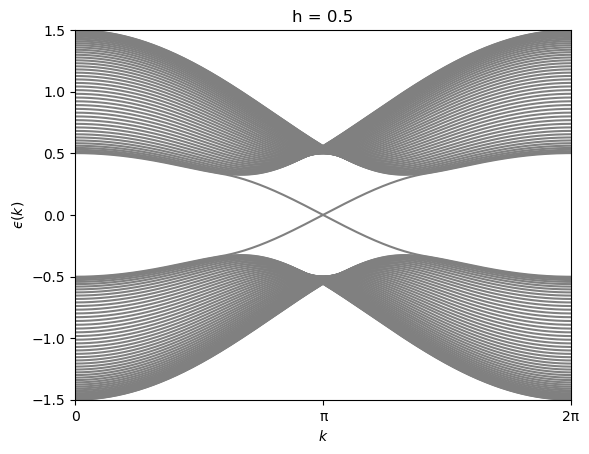

0-element Array{Any,1}

In [8]:
plot_h(0.5)

# Generate animation of the spectrum for varying $h$

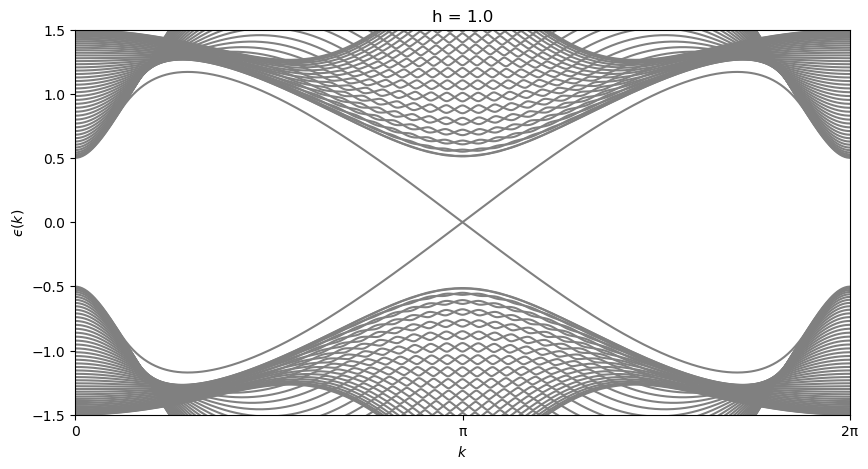

In [10]:
fig = figure(figsize=(10,5))
ax = axes()

n = 100
l = 1
interval = 150
function animate(k)
     plot_h(k/n)
end
function init()
     plot_h(0)
end
withfig(fig) do
     global myanim = anim.FuncAnimation(fig, animate, frames=l*n+1, init_func=init, interval=interval, blit=true)
     myanim[:save]("kitaev_honeycomb_magnetic_field_anim2.mp4",bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"]) end

In [12]:
function showmp4(filename)
     open(filename) do f
         base64_video = base64encode(f)
         display("text/html", """<video controls
src="data:video/x-m4v;base64,$base64_video">""")
     end
end

showmp4 (generic function with 1 method)

In [16]:
showmp4("kitaev_honeycomb_magnetic_field_anim2.mp4")

<video controls
src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAIhRxtZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjYzOCA3NTk5MjEwIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTYgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAARCHZYiEABP//vexj4FNyAANlzqKeh/hFbH0kFF6sdmgZOoAAAMAAAMAAAMAAAMCuBozYYClTkhoSAAAAwABcxfhKVH9QXC67CAXBGWhzWRyNGU7e7L3jFZ/ymW5Fk4JR7i6sMHf/Y0K9D19ye/Eermw0N7M1R8mrPtqLsm7rT0sq7JR05iRdP7Uy1F5i5/7hyo8JxwiDCKtHV3J3jej2Rq9wlR/17gGKCTQvf9+JOO0/FhLQNzGrlXQ+EByoceePtp4MPc0NjXV6gqDuizRzQHZ4zLrmqp4zLUnPNHJuGi6EWUaWwx4RUpwjcVIqCtG9oiZVenB3rfpllPXIJHTiNHaPXs2B3cpWjvkp3zlkBnYdR9P9Z6Tw44w6/Ip4fdb6DhgzCaNz2lu8RK7djcIz7oZj4N9v4s9nF1N+5i3zThWefBQ9hVSCs5BzYPlQ2bDQJddTcJvqNZkKih3ctI1S2CfbOGNaXMgfPTNAdhfzqd8crTOo1Jb6wo57ptbcAnDY/CAFnYpvy7R8LMbXhKRVGQ0N/L+mPdmA3pWjc4h4A+GLvq+gyBr9qNb4/bF6gnLiVFollcqBrycWkhplHo0qn0fxMHKZvENQPcWkh9GmVXbvPLhXDxVC44zFHKBwGlCZZcrdk5YEerpxtx4sUg6DqXFf+rPJk890zYFHDzes6D0lNL5mw5KU60KDvAnTq/PdJWR9kX9G2Ma93SoGk0wvjV6yYXgS2rhDbG2fPkUceTtz070Qe+CVbQdlMso+h4oOWfLAEAmXtgav7rAOOWWJKH5u/NZol93tNpbiUytzAvICYixG+1GTk8Km+aakOOysN3wDMaNFuNd9sh6HhmaCIndLUyM74mzIaTwsJBc2qGfz9F3KPPLKxmvnp4QC4UneJTO8MEwcLP01/BPYhnoDweyna5dhgPncg1mOFR6QH0kpE8qo1Zw2QY6IdfnQw8Mz8BVxcVkMJkILfSBgXOQws/XYKw5JCMfAT4fOsQzZB6EgVv+Nz//1ZPgVenxF89f//PjChWdw0aA6a7pXDo+fCGx0Ki8r+O2+3F8IuYS9zw8Fblt12eNtudvnz7XtID9S7nMSMR77qL7ajNpFrmYC7jOqz2xPSj3+ZhSvAxh2fMz0x7zUeUN4/hbqW3nMzSNIUvIyqukigsaCyPlEGun4AVmOKx+eMyRrLPig45wJ2NYCL5902GilNWTmHma+JeVblQRDo4b2/yudYBtTCkPucATT1oFTjj/FfdHBBLlH1QpnXNOqYItaoh2lJmq1mkT85LtRDcH6N6GxnOxtryeh6BGOEoxKfj+Ei/11/v8aapS/F7Zc+la4T8NScb3Le/1zhpO/dlIwQN1rpnkBHrDa80ggjZD+k9sBQGtak5iuf0GoXUQ1Dx8a0pjnkvSv4vNj5ZXaJZaPZyA0tMBUJl0zy0TfJIlFJCi6w1ahSxP7rDNH0BhkqXuYo2V9lrVKOETKnU3I1uDjh3x3kYKChwtUXbnp05WnINbkA0RVCRaBmB2d+wwl2SSIM/k+zPqC7pzuBxkInwTsGXKzQ3ufK99Z0CQFAN/MOaCK19ti/aqLROwFcAk+JGeRHQoSyP6mIbr+vbh1tTDxRNYIPQnQT+OBr4rpfenckrLocOuFC1Ig0SP7KO0zvP9g425dI1qdf4sRqFxS7xK+IepP1v0NmYifWkHCaxCTa6yS5KIzNpsmPxHFXumO6oSjG5n75YSIUNRvEuvsPXRV9ztEfqa59EeB0v1rn6NrEUiCx62AVr465rkxkiKe5JNuAFLFDZVw8WVup0VFpUSVzvXDFnpECIVQL5YJJQ7LCvgksxlhMx2JGFPKyirNXoVM60zRwaOm1MSFxS9HJtv8+B1/c01K9TvdftO1/1WxgMCZQiyoiqoSTeAfmkxstOUkXZJpWzSflY/KjSTxD+uzpadrN5MfADaYe4xBjGAXV8OEMuv2HDWlwvLH6Z2roovUFoFJOPpOhVfGd64O1bMvIqy/YwQRtlHMkM3A8osDDBZN1LYCCEv4kymPxUxrpGBeYBtUL7+EBNb1g/xZ9yEZgZXZODHT4sqe+v8WTnRzHeuA3CwuwBpWiUmhM8/jtGBRCcFAJLNqhQtI8dclDHhfgGwwSkq5OcSWFenk/52h8HjccPTraxCB4wBWVosSx0ez7RXMLK2ADWnU394udR7Pg/7+tSw7dSZ1xzxK9smwTJSs6Oz4/fpIziHuU9eDwZMZrgxefVG+km7n8Jt3hdOcAwggqMeB7rhTpllYOZpgMGraxgXa7CdX9zxEtnbj/eAiJ222SFZzjQjFvbzSGG5HNG9bIvc8l2G0MC9JMxtKEE1MCPoxrIs56Td6ZTidKKgoB3i28xQjFX7+Lyo+DJ3oD2R0LMVnkA6Pyq/4u5VexcaL5XF7h+pp9CaRSTJMEM+gdnEKBHQYxEGP3pIizUDSkFDgCI9JBzfSfpMUa/nFW4JwKhIg5p5/tXCLs9uCEoygNhHM0/bdLBCIPdKya1pHVpUg7R/H9hd/u7BviktMt6LzI5c7Oc0SMxNb/If2PawEYXZ+HHVbxhMmMdPlq6BYrzLttgYcVyEA4IdZ0HHKhvbm+XtYLu7J7C2QH3ZUMqTcqXN5YxOlwx42piftv/jBfBVX04bvg2RMo7Xzw9OFjEmw24I30YIstOmgRvVnz2zypR0F2ja2dqxuZ9ggHNFYdRug6RdLe9DGPSPEluVUCuIDVpDxStLBM30qZoKjgJMhxoRuJfuGL7i/MnxLQe5Wxd0T9qXEW2PvMfOoqOKRz9XVs/rDdzujg5gEeo75kulNXuEOK8+G+VOwCA5t2Ozs9/bbjsy8xp20X+2M5aj83SvSpD1IBfArPDkjw3FtosMS7MP6Xw4k6eWx6zFOHMXDHGwHqCLcTq1qt8Q3PPmvJQjdIySHzS4pTG/TlPQctGsAV2lbGdm+qf7BhxscA0QWs6Hglvpuk7CUiDIpvA